# Importing libraries & dataset

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_excel('/content/cleaned_data.xlsx')

In [104]:
df.head()

,Hashed_NRIC,Hashed_Name,Birth Year,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region
0,d7442e5d,a4e7b116,1976,0,3,1600,2002,48600,Bedok
1,8676061e,9988e3b0,1999,0,3,1520,2015,40400,Bedok
2,572da3d0,db417bdd,1996,1,0,0,2012,46400,Bedok
3,be9c6a3e,9aac7c63,1985,0,2,970,2002,38500,Bedok
4,f381b159,4912b577,1987,0,5,2430,2014,26200,Bedok


# Feature Engineering

## Removing unuseful columns

In [105]:
df.drop(['Hashed_NRIC', 'Hashed_Name'], axis=1, inplace=True)

## Converting Birth Year and Year Joined into more useful columns : Age, Years as Member

In [106]:
df['Age'] = 2025 - df['Birth Year']
df['Years as Member'] = 2025 - df['Year Joined']
df.drop(['Birth Year', 'Year Joined'], axis=1, inplace=True)

## Binning

In [107]:
df2 = df.copy()

In [108]:
df2.describe()

,Cred Card User,Purchases,Amount Spent,Income,Age,Years as Member
count,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,0.398401,3.695536,2998.977348,50049.900067,37.243171,16.519654
std,0.489732,3.775523,7735.837530,23452.961327,9.101730,11.748381
min,0.000000,0.000000,0.000000,21800.000000,20.000000,0.000000
25%,0.000000,2.000000,970.000000,32200.000000,30.000000,7.000000
50%,0.000000,3.000000,1490.000000,43900.000000,37.000000,14.000000
75%,1.000000,4.000000,2070.000000,62800.000000,45.000000,25.000000
max,1.000000,30.000000,64673.000000,169100.000000,53.000000,45.000000


In [109]:
df2['Age_bin'] = pd.cut(df2['Age'], bins=[0, 29, 39, 49, 59], labels=['20s', '30s', '40s', '50s'])

In [110]:
df2['Years as Member_bin'] = pd.cut(df2['Years as Member'],
                                   bins=[0,10,20,30,40,50],
                                   labels=['0-10','11-20','21-30','31-40','Above 40'])

In [111]:
df2.drop(['Age', 'Years as Member'], axis=1, inplace=True)
df2.head()

,Cred Card User,Purchases,Amount Spent,Income,Region,Age_bin,Years as Member_bin
0,0,3,1600,48600,Bedok,40s,21-30
1,0,3,1520,40400,Bedok,20s,0-10
2,1,0,0,46400,Bedok,20s,11-20
3,0,2,970,38500,Bedok,40s,21-30
4,0,5,2430,26200,Bedok,30s,11-20


## Encoding

In [112]:
df2 = pd.get_dummies(df2, columns=['Age_bin','Years as Member_bin','Region']).astype(int)
df2.head()

,Cred Card User,Purchases,Amount Spent,Income,Age_bin_20s,Age_bin_30s,Age_bin_40s,Age_bin_50s,Years as Member_bin_0-10,Years as Member_bin_11-20,Years as Member_bin_21-30,Years as Member_bin_31-40,Years as Member_bin_Above 40,Region_Bedok,Region_Jurong,Region_Malaysia,Region_USA
0,0,3,1600,48600,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,3,1520,40400,1,0,0,0,1,0,0,0,0,1,0,0,0
2,1,0,0,46400,1,0,0,0,0,1,0,0,0,1,0,0,0
3,0,2,970,38500,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,5,2430,26200,0,1,0,0,0,1,0,0,0,1,0,0,0


## Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform='pandas')
cols = ["Purchases", "Amount Spent", "Income"]
df2[cols] = scaler.fit_transform(df2[cols]).set_axis(cols, axis=1)

In [114]:
df2.head()

,Cred Card User,Purchases,Amount Spent,Income,Age_bin_20s,Age_bin_30s,Age_bin_40s,Age_bin_50s,Years as Member_bin_0-10,Years as Member_bin_11-20,Years as Member_bin_21-30,Years as Member_bin_31-40,Years as Member_bin_Above 40,Region_Bedok,Region_Jurong,Region_Malaysia,Region_USA
0,0,-0.184284,-0.180904,-0.061842,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,-0.184284,-0.191249,-0.411595,1,0,0,0,1,0,0,0,0,1,0,0,0
2,1,-0.979141,-0.387802,-0.155678,1,0,0,0,0,1,0,0,0,1,0,0,0
3,0,-0.449236,-0.262370,-0.492635,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,0.345621,-0.073575,-1.017264,0,1,0,0,0,1,0,0,0,1,0,0,0


# Clustering

In [115]:
from sklearn.cluster import KMeans

wss =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df2)
    wss.append(kmeans.inertia_)

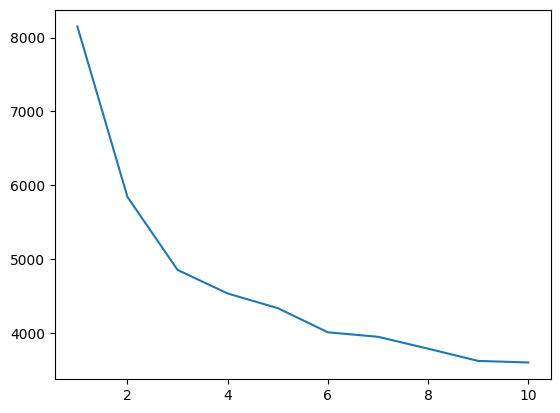

In [116]:
f3, ax = plt.subplots()
plt.plot(range(1,11), wss)
plt.show()

In [117]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df2)
df["Cluster"] = df["Cluster"].astype("category")

## EDA

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Cred Card User   1501 non-null   int64   
 1   Purchases        1501 non-null   int64   
 2   Amount Spent     1501 non-null   int64   
 3   Income           1501 non-null   int64   
 4   Region           1501 non-null   object  
 5   Age              1501 non-null   int64   
 6   Years as Member  1501 non-null   int64   
 7   Cluster          1501 non-null   category
dtypes: category(1), int64(6), object(1)
memory usage: 83.8+ KB


In [119]:
df['Cred Card User'] = df['Cred Card User'].astype('category')
df['Region'] = df['Region'].astype('category')

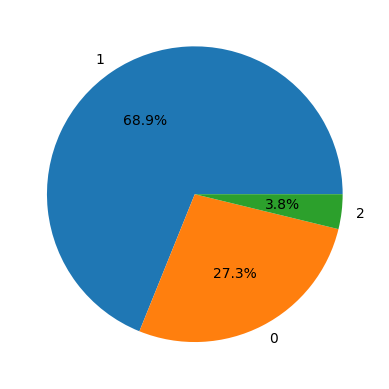

In [120]:
cluster_counts = df['Cluster'].value_counts()
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.show()

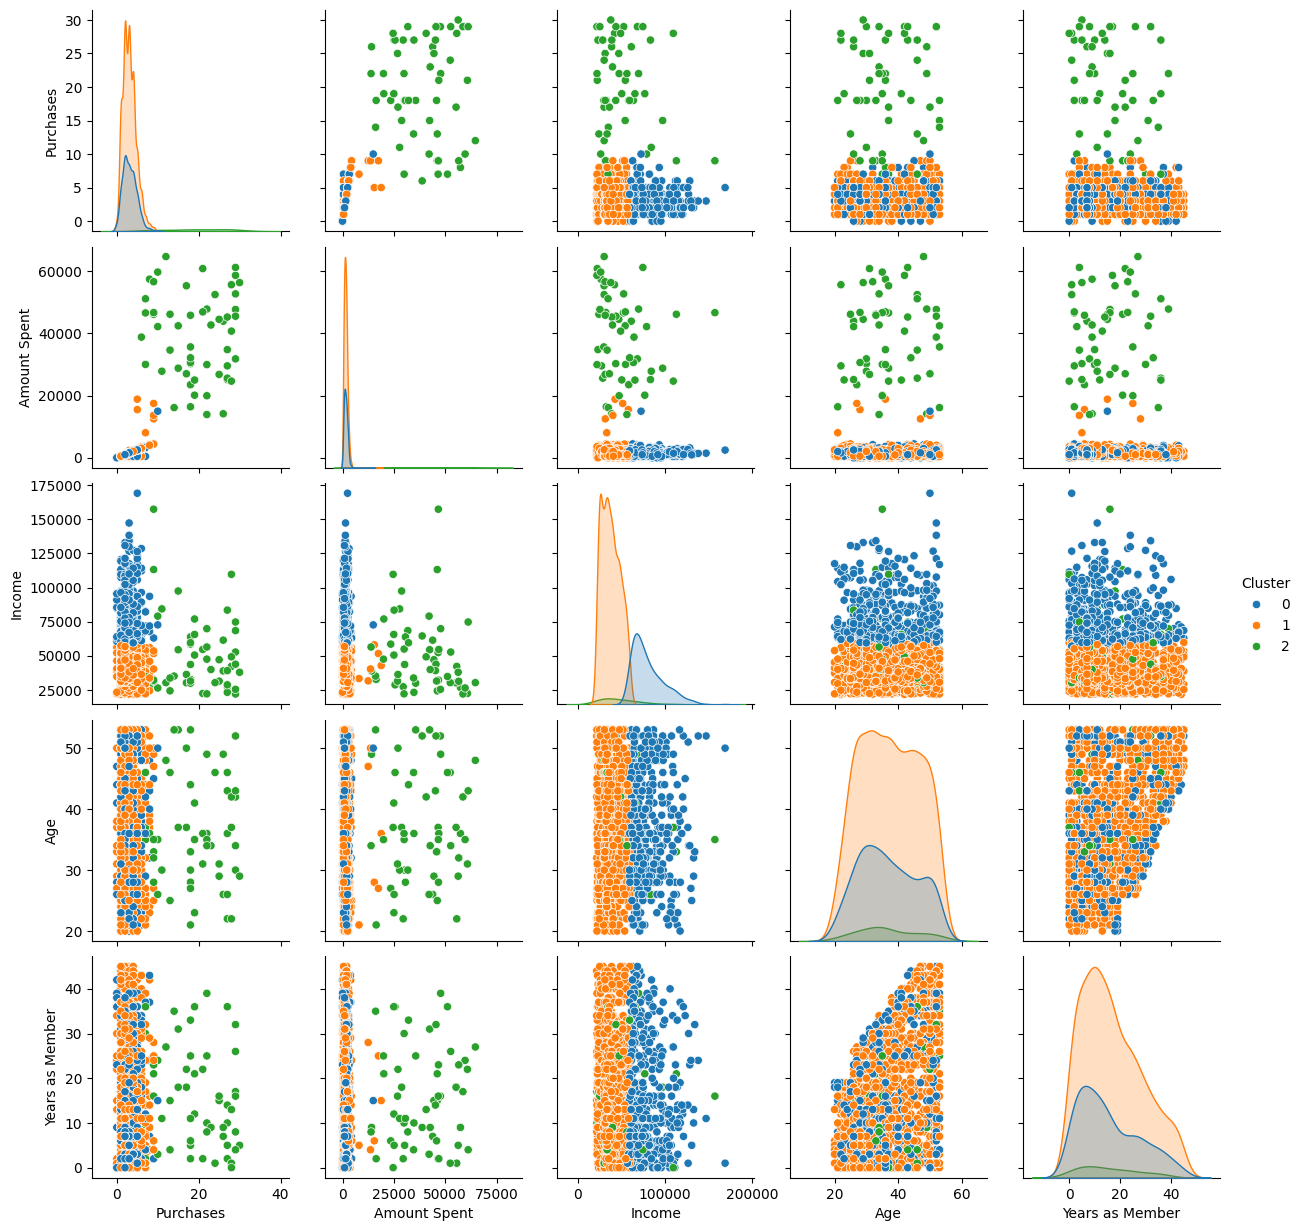

In [121]:
sns.pairplot(df, hue="Cluster")
plt.show()

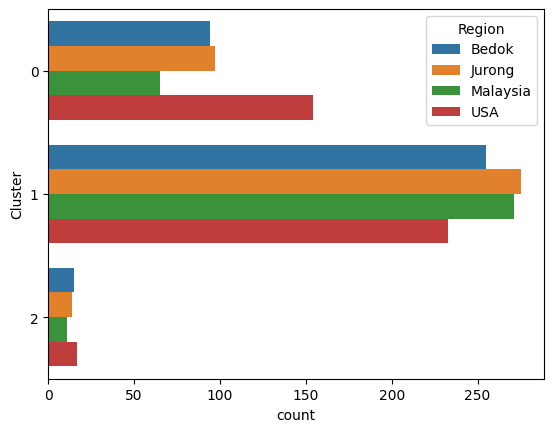

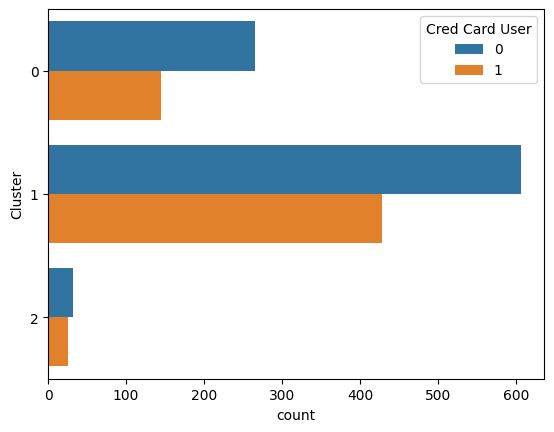

In [122]:
for col in ['Region','Cred Card User']:
    sns.countplot(y="Cluster", hue =col, data=df)
    plt.show()

# Findings

* **Cluster 2: The "High-Value Customers"**\
This is the smallest but most valuable segment. These customers are characterized by high purchase frequency and high spending.

* **Cluster 1: The "Core Customers"**\
This is the largest segment across all regions. Their purchasing frequency and spending are moderate due to the lower than average income, however, the size of this group makes them the primary engine of consistent revenue.

* **Cluster 0: The "At-Risk Customers"**\
This segment exhibits low purchase frequency and low spending, despite having above average incomes. This suggests they are either disengaged and at risk of churning. Notably, this cluster is significantly larger in the USA compared to the other regions.

## Recommendations
* **Cluster 2: Retain & reward**
  - Implement a loyalty program with exclusive perks like early access to new products, dedicated customer service, and special event invitations.
  - Use their purchase history to offer personalized products.
  - Actively gather feedback on products and services to make them feel valued.

* **Cluster 1: Growth strategy**
  - Develop targeted campaigns to increase their purchase frequency and average order value as they mature.
  - Upsell or cross-sell new product categories and higher-value items.
  - Encourage repeat purchases through a points-based loyalty program or tiered rewards that unlock with increased spending.

* **Cluster 3: Re-engagement strategy**
  - Launch targeted campaigns with to encourage new purchases.
  - Use surveys to understand why their engagement is low. Are there price, product, or service issues?
  - Given the higher concentration in the USA, investigate market-specific factors that may be contributing to this behavior and tailor a regional activation plan.